# CFM 301 Data Assignment 1 Q2a

Jeongseop Yi (j22yi / 20727267)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import linear_model
import statsmodels.api as sm

In [2]:
amzn_data = pd.read_csv("../csv/amazon.csv")
amzn_data.columns = map(str.lower, amzn_data.columns)

ff_factors = pd.read_csv("../csv/ff_factors.csv")
ff_factors.columns = map(str.lower, ff_factors.columns)

ff_factors["dateff"] = pd.to_datetime(ff_factors["dateff"], format='%Y%m%d')
ff_factors["yyyymm"] = ff_factors.dateff.dt.year*100 + ff_factors.dateff.dt.month

amzn_data["date"] = pd.to_datetime(amzn_data["date"], format='%Y%m%d')
amzn_data["yyyymm"] = amzn_data.date.dt.year*100 + amzn_data.date.dt.month

ret_matrix = pd.merge(amzn_data, ff_factors, on="yyyymm")

In [3]:
ret_matrix['xret'] = ret_matrix["ret"] - ret_matrix['rf']
ret_matrix['xvwretd'] = ret_matrix["vwretd"] - ret_matrix['rf']
x = sm.add_constant(ret_matrix['xvwretd'])
model = sm.OLS(ret_matrix['xret'], x).fit()

print("alpha: " + str(round(model.params['const'], 5)))
print("beta: " + str(round(model.params['xvwretd'], 4)))
print("R^2: " + str(round(model.rsquared, 3)))

alpha: 0.01317
beta: 1.4785
R^2: 0.259


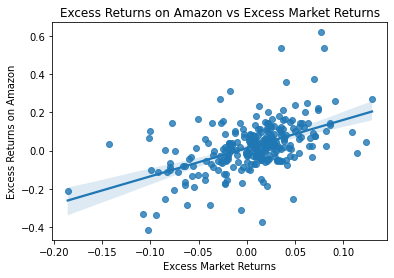

In [4]:
sns.regplot(x = ret_matrix['xvwretd'], y = ret_matrix['xret'])
plt.xlabel("Excess Market Returns")
plt.ylabel("Excess Returns on Amazon")
plt.title("Excess Returns on Amazon vs Excess Market Returns")
plt.show()

In [5]:
with pd.ExcelWriter("../xlsx/CA1_data.xlsx", mode='a', engine="openpyxl", if_sheet_exists='replace') as writer:
    ret_matrix.to_excel(writer, sheet_name="q2a")